In [ ]:
'''from google.colab import drive
drive.mount("/content/drive")'''

/content


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [ ]:
def writeImage(path):
  video = cv2.VideoCapture(path)

  if video.isOpened() == False:
    print("Error: Cannot open video file")

  imageArr = []
  while(video.isOpened()):
    ret, frame = video.read()
    if (ret == True):
      imageArr.append(frame)
    else:
      break

  path = path[:path.find(".")]
  for i in tqdm(range(0, len(imageArr))):
    #print(path + "/image" + f'{i:03}' + ".jpg")
    cv2.imwrite(path + "/image" + f'{i:03}' + ".jpg", imageArr[i])

directory = "/content/drive/MyDrive/csci576/"
#writeImage(directory + "test2.mp4")


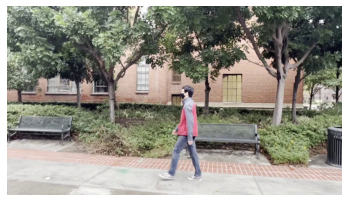

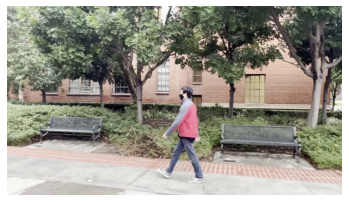

In [ ]:
def displayImage(path, colorCode):
  cv_img = cv2.imread(path)
  img = cv2.cvtColor(cv_img, colorCode)
  plt.imshow(img)
  plt.axis('off')
  plt.show()

displayImage("/content/drive/MyDrive/csci576/test1/image001.jpg", cv2.COLOR_BGR2RGB)
displayImage("/content/drive/MyDrive/csci576/test1/image020.jpg", cv2.COLOR_BGR2RGB)

In [ ]:
!pip install cvzone

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for cvzone: filename=cvzone-1.5.6-py3-none-any.whl size=18767 sha256=4e57eaabc75f716ede976a19fb215ec6f0812f0a82dbdf82eb0c666eaf640598
  Stored in directory: /root/.cache/pip/wheels/67/60/9a/e5060027d8eae2c01ba872fdbc094a6fe3fee15794ee3dc709
Successfully built cvzone


In [ ]:
!pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 33.0 MB 106.7 MB/s 
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully uninstalled flatbuffers-1.12
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires flatbuffers<2,>=1.12, but you have flatbuffers 22.11.23 which is incompatible.


(-0.5, 1919.5, 1079.5, -0.5)

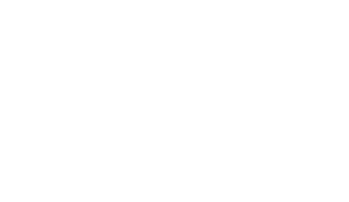

In [ ]:
from cvzone.PoseModule import PoseDetector

def cropHuman(fileName):
  detector = PoseDetector()
  img = detector.findPose(np.copy(fileName))
  lmFirst, bboxInfo = detector.findPosition(img, draw=False)
  minX, minY = float('inf'), float('inf')
  maxX, maxY = -float('inf'), -float('inf')
  border = 3
  # Create foreground element image
  # find Box range
  for i in range(len(lmFirst)):
    minX = min(minX, lmFirst[i][1]) - border
    maxX = max(maxX, lmFirst[i][1]) + border
    minY = min(minY, lmFirst[i][2]) - border
    maxY = max(maxY, lmFirst[i][2]) + border

  imageHeight = imgOrigin.shape[0]
  imageWidth = imgOrigin.shape[1]
  channels = 3
  color = (255, 255, 255)
  croppedImg = np.full((imageHeight, imageWidth, channels), color, dtype=np.uint8)

  if minX != float('inf') and minY != float('inf') and maxX != -float('inf') and maxY != -float('inf'):
    for x in range(minX, maxX + 1):
      for y in range(minY, maxY + 1):
        croppedImg[y][x][0] = imgOrigin[y][x][0]
        croppedImg[y][x][1] = imgOrigin[y][x][1]
        croppedImg[y][x][2] = imgOrigin[y][x][2]

  return croppedImg

imgOrigin = cv2.imread("/content/drive/MyDrive/csci576/test1/image359.jpg")
croppedImg = cropHuman(imgOrigin)

import matplotlib.pyplot as plt
plt.imshow(croppedImg)
plt.axis('off')

# https://pyimagesearch.com/2018/12/17/image-stitching-with-opencv-and-python/

In [ ]:
from imutils import paths
import numpy as np
import argparse
import imutils
import cv2
import os
from pathlib import Path
from tqdm import tqdm

In [ ]:
def ReadImage(ImageFolderPath, toFrameNum, skipFrame):
    ImageFolderPath = ImageFolderPath + "/" if ImageFolderPath[-1] != "/" else ImageFolderPath
    Images = []									# Input Images will be stored in this list.

	# Checking if path is of folder.
    if os.path.isdir(ImageFolderPath):                              # If path is of a folder contaning images.
        ImageNames = os.listdir(ImageFolderPath)
        ImageNames

        ImageNames_Split = []
        for toFrameIndex in toFrameNum:
          for i in range(0, len(ImageNames), skipFrame):
            ImageName = ImageNames[i]
            if (Path(ImageFolderPath + ImageName).is_file()):
              ImageNames_Split.append([int(os.path.splitext(os.path.basename(ImageName))[0].replace("image", "")), ImageName])

        ImageNames_Split = sorted(ImageNames_Split, key=lambda x:x[0])
        ImageNames_Sorted = [ImageNames_Split[i][1] for i in range(len(ImageNames_Split))]

        for i in tqdm(range(len(ImageNames_Sorted))):                     # Getting all image's name present inside the folder.
            ImageName = ImageNames_Sorted[i]
            InputImage = cv2.imread(ImageFolderPath + "/" + ImageName)  # Reading images one by one.

            # Checking if image is read
            if InputImage is None:
                print("Not able to read image: {}".format(ImageName))
                exit(0)

            Images.append(InputImage)                               # Storing images.

    else:                                       # If it is not folder(Invalid Path).
        print("\nEnter valid Image Folder Path.\n")

    if len(Images) < 2:
        print("\nNot enough images found. Please provide 2 or more images.\n")
        exit(1)
    #print(len(Images), Images)
    return Images

toFrameNum = [200]
frameSkip = [8, 14]
source = ""
Images = ReadImage("/content/drive/MyDrive/csci576/test1/" + source, toFrameNum,frameSkip)

stitcher = cv2.createStitcher() if imutils.is_cv3() else cv2.Stitcher_create()
(status, stitched) = stitcher.stitch(Images)

100%|██████████| 37/37 [00:02<00:00, 15.56it/s]


In [ ]:
import matplotlib.pyplot as plt

if status == 0:
	# write the output stitched image to disk
	cv2.imwrite("/content/drive/MyDrive/csci576/test1/panorama/panorama-" + source + "-" + str(frameSkip) + ".png", stitched)
	# display the output stitched image to our screen
  #stitched = cv2.cvtColor(stitched, cv2.COLOR_BGR2RGB)
  #plt.imshow(stitched)
  #plt.axis('off')
# otherwise the stitching failed, likely due to not enough keypoints)
# being detected
else:
	print("[INFO] image stitching failed ({})".format(status))

# https://github.com/MCG-NKU/E2FGVI ✔

In [ ]:
#!pip install opencv-python
#!pip install pillow
#!pip install matplotlib
#!pip install torch
#!pip install torchvision

!pip install mmcv-full

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached mmcv-full-1.7.0.tar.gz (593 kB)


In [ ]:
!python test.py --model e2fgvi_hq --video examples/tennis --mask examples/tennis_mask  --ckpt release_model/E2FGVI-HQ-CVPR22.pth

/content/miniconda3/lib/python3.7/site-packages/mmcv/__init__.py:21: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  'On January 1, 2023, MMCV will release v2.0.0, in which it will remove '
Traceback (most recent call last):
  File "test.py", line 224, in <module>
    main_worker()
  File "test.py", line 117, in main_worker
    net = importlib.import_module('model.' + args.model)
  File "/content/miniconda3/lib/python3.7/importlib/__init__.py", line 127, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "<frozen importlib._bootstrap>", line 1006, in _gcd_import
  File "<frozen importlib._bootstrap>", line 983, in _find_and_load
  File "<frozen importlib._

In [ ]:
import cv2
from PIL import Image
import numpy as np
import importlib
import os
import argparse
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib import animation
import torch
import mmcv

from core.utils import to_tensors

arg_video = 'examples/tennis'
arg_ckpt = 'release_model/E2FGVI-HQ-CVPR22.pth'
arg_mask = 'examples/tennis_mask'
arg_model = 'e2fgvi_hq'

ref_length = 10
num_ref = -1
neighbor_stride = 5
default_fps = 30

# args for e2fgvi_hq (which can handle videos with arbitrary resolution)
arg_setSize = False
arg_width = None
arg_height = None

ModuleNotFoundError: ignored

In [ ]:
# sample reference frames from the whole video
def get_ref_index(f, neighbor_ids, length):
    ref_index = []
    if num_ref == -1:
        for i in range(0, length, ref_length):
            if i not in neighbor_ids:
                ref_index.append(i)
    else:
        start_idx = max(0, f - ref_length * (num_ref // 2))
        end_idx = min(length, f + ref_length * (num_ref // 2))
        for i in range(start_idx, end_idx + 1, ref_length):
            if i not in neighbor_ids:
                if len(ref_index) > num_ref:
                    break
                ref_index.append(i)
    return ref_index


# read frame-wise masks
def read_mask(mpath, size):
    masks = []
    mnames = os.listdir(mpath)
    mnames.sort()
    for mp in mnames:
        m = Image.open(os.path.join(mpath, mp))
        m = m.resize(size, Image.NEAREST)
        m = np.array(m.convert('L'))
        m = np.array(m > 0).astype(np.uint8)
        m = cv2.dilate(m,
                       cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3)),
                       iterations=4)
        masks.append(Image.fromarray(m * 255))
    return masks


#  read frames from video
def read_frame_from_videos(arg_video, arg_usemp4):
    vname = arg_video
    frames = []
    if arg_usemp4:
        vidcap = cv2.VideoCapture(vname)
        success, image = vidcap.read()
        count = 0
        while success:
            image = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            frames.append(image)
            success, image = vidcap.read()
            count += 1
    else:
        lst = os.listdir(vname)
        lst.sort()
        fr_lst = [vname + '/' + name for name in lst]
        for fr in fr_lst:
            image = cv2.imread(fr)
            image = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            frames.append(image)
    return frames


# resize frames
def resize_frames(frames, size=None):
    if size is not None:
        frames = [f.resize(size) for f in frames]
    else:
        size = frames[0].size
    return frames, size

In [ ]:
def main_worker():
    # set up models
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    if arg_model == "e2fgvi":
        size = (432, 240)
    elif arg_setSize:
        size = (arg_width, arg_height)
    else:
        size = None

    net = importlib.import_module('model.' + arg_model)
    model = net.InpaintGenerator().to(device)
    data = torch.load(arg_ckpt, map_location=device)
    model.load_state_dict(data)
    print(f'Loading model from: {arg_ckpt}')
    model.eval()

    # prepare datset
    arg_usemp4 = True if arg_video.endswith('.mp4') else False
    print(
        f'Loading videos and masks from: {arg_video} | INPUT MP4 format: {arg_usemp4}'
    )
    frames = read_frame_from_videos(arg_video, arg_usemp4)
    frames, size = resize_frames(frames, size)
    h, w = size[1], size[0]
    video_length = len(frames)
    imgs = to_tensors()(frames).unsqueeze(0) * 2 - 1
    frames = [np.array(f).astype(np.uint8) for f in frames]

    masks = read_mask(arg_mask, size)
    binary_masks = [
        np.expand_dims((np.array(m) != 0).astype(np.uint8), 2) for m in masks
    ]
    masks = to_tensors()(masks).unsqueeze(0)
    imgs, masks = imgs.to(device), masks.to(device)
    comp_frames = [None] * video_length

    # completing holes by e2fgvi
    print(f'Start test...')
    for f in tqdm(range(0, video_length, neighbor_stride)):
        neighbor_ids = [
            i for i in range(max(0, f - neighbor_stride),
                             min(video_length, f + neighbor_stride + 1))
        ]
        ref_ids = get_ref_index(f, neighbor_ids, video_length)
        selected_imgs = imgs[:1, neighbor_ids + ref_ids, :, :, :]
        selected_masks = masks[:1, neighbor_ids + ref_ids, :, :, :]
        with torch.no_grad():
            masked_imgs = selected_imgs * (1 - selected_masks)
            mod_size_h = 60
            mod_size_w = 108
            h_pad = (mod_size_h - h % mod_size_h) % mod_size_h
            w_pad = (mod_size_w - w % mod_size_w) % mod_size_w
            masked_imgs = torch.cat(
                [masked_imgs, torch.flip(masked_imgs, [3])],
                3)[:, :, :, :h + h_pad, :]
            masked_imgs = torch.cat(
                [masked_imgs, torch.flip(masked_imgs, [4])],
                4)[:, :, :, :, :w + w_pad]
            pred_imgs, _ = model(masked_imgs, len(neighbor_ids))
            pred_imgs = pred_imgs[:, :, :h, :w]
            pred_imgs = (pred_imgs + 1) / 2
            pred_imgs = pred_imgs.cpu().permute(0, 2, 3, 1).numpy() * 255
            for i in range(len(neighbor_ids)):
                idx = neighbor_ids[i]
                img = np.array(pred_imgs[i]).astype(
                    np.uint8) * binary_masks[idx] + frames[idx] * (
                        1 - binary_masks[idx])
                if comp_frames[idx] is None:
                    comp_frames[idx] = img
                else:
                    comp_frames[idx] = comp_frames[idx].astype(
                        np.float32) * 0.5 + img.astype(np.float32) * 0.5

    # saving videos
    print('Saving videos...')
    save_dir_name = 'results'
    ext_name = '_results.mp4'
    save_base_name = arg_video.split('/')[-1]
    save_name = save_base_name.replace(
        '.mp4', ext_name) if arg_usemp4 else save_base_name + ext_name
    if not os.path.exists(save_dir_name):
        os.makedirs(save_dir_name)
    save_path = os.path.join(save_dir_name, save_name)
    writer = cv2.VideoWriter(save_path, cv2.VideoWriter_fourcc(*"mp4v"),
                             default_fps, size)
    for f in range(video_length):
        comp = comp_frames[f].astype(np.uint8)
        writer.write(cv2.cvtColor(comp, cv2.COLOR_BGR2RGB))
    writer.release()
    print(f'Finish test! The result video is saved in: {save_path}.')

    # show results
    print('Let us enjoy the result!')
    fig = plt.figure('Let us enjoy the result')
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.axis('off')
    ax1.set_title('Original Video')
    ax2 = fig.add_subplot(1, 2, 2)
    ax2.axis('off')
    ax2.set_title('Our Result')
    imdata1 = ax1.imshow(frames[0])
    imdata2 = ax2.imshow(comp_frames[0].astype(np.uint8))

    def update(idx):
        imdata1.set_data(frames[idx])
        imdata2.set_data(comp_frames[idx].astype(np.uint8))

    fig.tight_layout()
    anim = animation.FuncAnimation(fig,
                                   update,
                                   frames=len(frames),
                                   interval=50)
    plt.show()

main_worker()

ModuleNotFoundError: ignored

ModuleNotFoundError: ignored

# Deeplabv3 ✔

In [ ]:
import torch
#model = torch.hub.load('pytorch/vision:v0.10.0', 'deeplabv3_resnet50', pretrained=True)
# or any of these variants
model = torch.hub.load('pytorch/vision:v0.10.0', 'deeplabv3_resnet101', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.10.0', 'deeplabv3_mobilenet_v3_large', pretrained=True)
model.eval()

In [ ]:
# sample execution (requires torchvision)
from PIL import Image
from torchvision import transforms
import sys

def storeIntermediateOutput(folder_dir, images):
  fileName = folder_dir + images

  #input_image = cropHuman(Image.open(fileName))
  input_image = Image.open(fileName)
  #input_image = Image.fromarray(np.uint8(input_image)).convert("RGB")
  input_image = input_image.convert("RGB")

  preprocess = transforms.Compose([
      transforms.ToTensor(),
      transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
  ])

  input_tensor = preprocess(input_image)
  input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

  # move the input and model to GPU for speed if available
  if torch.cuda.is_available():
      input_batch = input_batch.to('cuda')
      model.to('cuda')

  with torch.no_grad():
      output = model(input_batch)['out'][0]
  output_predictions = output.argmax(0)

  # create a color pallette, selecting a color for each class
  palette = torch.tensor([2 ** 25 - 1, 2 ** 15 - 1, 2 ** 21 - 1])
  colors = torch.as_tensor([i for i in range(21)])[:, None] * palette
  colors = (colors % 255).numpy().astype("uint8")
  humanNum = 15
  for i in range(0, len(colors)):
    if (i != humanNum):
      colors[i] = [i, 0, 0]

  # plot the semantic segmentation predictions of 21 classes in each color
  r = Image.fromarray(output_predictions.byte().cpu().numpy()).resize(input_image.size)
  r.putpalette(colors)


  img = np.asarray(input_image)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  #cv2.imwrite("img.jpg",img)
  mask = np.asarray(r)
  newMask = np.copy(mask)
  img[img[::]] = 0
  for i in range(0, 10):
    for j in range(0, 10):
      print(img[i][j], type(img[i][j]))
  #np.set_printoptions(threshold=sys.maxsize)
  newMask[newMask != 15] = 0
  #plt.imshow(newMask)
  #plt.axis('off')
  #r.save(folder_dir + "mask/" + images.replace("jpg", "png").replace("image", "00"))
  foregroundImage = cv2.bitwise_and(img, img, mask=newMask)

  backgroundImage = cv2.bitwise_xor(img, foregroundImage)

  #cv2.imwrite(fileName.replace("test2/", "test2/foreground/"), foregroundImage)
  #cv2.imwrite(fileName.replace("test2/", "test2/background/"), backgroundImage)

In [ ]:
storeIntermediateOutput("/content/drive/MyDrive/csci576/test2/", "image339.jpg")

NameError: ignored

In [ ]:
import os
from os import listdir

folder_dir = "/content/drive/MyDrive/csci576/test2/"
for images in tqdm(os.listdir(folder_dir)):
    # check if the image ends with jpg
    if (images.endswith(".jpg")):
        storeIntermediateOutput(folder_dir, images)

100%|██████████| 635/635 [15:30<00:00,  1.47s/it]


In [ ]:
import glob

def storeAsVideo(imgsPath,videoPath):
    imgArray = []
    files = glob.glob(imgsPath+'*.png')
    files = sorted(files)
    for filename in files:
        img = cv2.imread(filename)
        height, width, layers = img.shape
        size = (width, height)
        imgArray.append(img)
    out = cv2.VideoWriter(videoPath,cv2.VideoWriter_fourcc(*'mp4v'), 30, size)

    for i in range(len(imgArray)):
        out.write(imgArray[i])
    out.release()

storeAsVideo("/content/drive/MyDrive/csci576/test2/output3/", "/content/drive/MyDrive/csci576/test2/video/output3.mp4")
#storeAsVideo("/content/drive/MyDrive/csci576/test2/background/", "/content/drive/MyDrive/csci576/test2/video/background.mp4")

# Output 2 ✔

In [ ]:
import cv2
import numpy as np
import glob

frameSize = (1920, 1080)
out = cv2.VideoWriter("/content/drive/MyDrive/csci576/test2/video/output2.mp4", cv2.VideoWriter_fourcc(*'mp4v'), 1, frameSize)
imageNames = glob.glob("/content/drive/MyDrive/csci576/test2/output2/*.jpg")

horizontalP = 600
cameraPosition = []
start = 0
end = 3000
for verticalP in range(start, end, end // len(imageNames)):
  cameraPosition.append((verticalP, horizontalP))

print(cameraPosition)

[(0, 600), (34, 600), (68, 600), (102, 600), (136, 600), (170, 600), (204, 600), (238, 600), (272, 600), (306, 600), (340, 600), (374, 600), (408, 600), (442, 600), (476, 600), (510, 600), (544, 600), (578, 600), (612, 600), (646, 600), (680, 600), (714, 600), (748, 600), (782, 600), (816, 600), (850, 600), (884, 600), (918, 600), (952, 600), (986, 600), (1020, 600), (1054, 600), (1088, 600), (1122, 600), (1156, 600), (1190, 600), (1224, 600), (1258, 600), (1292, 600), (1326, 600), (1360, 600), (1394, 600), (1428, 600), (1462, 600), (1496, 600), (1530, 600), (1564, 600), (1598, 600), (1632, 600), (1666, 600), (1700, 600), (1734, 600), (1768, 600), (1802, 600), (1836, 600), (1870, 600), (1904, 600), (1938, 600), (1972, 600), (2006, 600), (2040, 600), (2074, 600), (2108, 600), (2142, 600), (2176, 600), (2210, 600), (2244, 600), (2278, 600), (2312, 600), (2346, 600), (2380, 600), (2414, 600), (2448, 600), (2482, 600), (2516, 600), (2550, 600), (2584, 600), (2618, 600), (2652, 600), (2686,

In [ ]:
for i in range(0, len(imageNames)):
  img = cv2.imread(imageNames[i])
  img = img[cameraPosition[i][1]:cameraPosition[i][1]+1080, cameraPosition[i][0]:cameraPosition[i][0]+1920]


  out.write(img)
  #print(img)
  break
out.release()

In [ ]:
print(glob.glob("/content/drive/MyDrive/csci576/test2/output2/*.jpg"))

['/content/drive/MyDrive/csci576/test2/output2/image000.jpg', '/content/drive/MyDrive/csci576/test2/output2/image001.jpg', '/content/drive/MyDrive/csci576/test2/output2/image002.jpg', '/content/drive/MyDrive/csci576/test2/output2/image003.jpg', '/content/drive/MyDrive/csci576/test2/output2/image004.jpg', '/content/drive/MyDrive/csci576/test2/output2/image005.jpg', '/content/drive/MyDrive/csci576/test2/output2/image006.jpg', '/content/drive/MyDrive/csci576/test2/output2/image007.jpg', '/content/drive/MyDrive/csci576/test2/output2/image008.jpg', '/content/drive/MyDrive/csci576/test2/output2/image009.jpg', '/content/drive/MyDrive/csci576/test2/output2/image010.jpg', '/content/drive/MyDrive/csci576/test2/output2/image011.jpg', '/content/drive/MyDrive/csci576/test2/output2/image012.jpg', '/content/drive/MyDrive/csci576/test2/output2/image013.jpg', '/content/drive/MyDrive/csci576/test2/output2/image014.jpg', '/content/drive/MyDrive/csci576/test2/output2/image015.jpg', '/content/drive/MyDrive

# https://github.com/KEDIARAHUL135/PanoramaStitchingP2 ✔

In [ ]:
import os
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
def FindMatches(BaseImage, SecImage):
    # Using SIFT to find the keypoints and decriptors in the images
    Sift = cv2.SIFT_create()
    BaseImage_kp, BaseImage_des = Sift.detectAndCompute(cv2.cvtColor(BaseImage, cv2.COLOR_BGR2GRAY), None)
    SecImage_kp, SecImage_des = Sift.detectAndCompute(cv2.cvtColor(SecImage, cv2.COLOR_BGR2GRAY), None)

    # Using Brute Force matcher to find matches.
    BF_Matcher = cv2.BFMatcher()
    InitialMatches = BF_Matcher.knnMatch(BaseImage_des, SecImage_des, k=2)

    # Applytng ratio test and filtering out the good matches.
    GoodMatches = []
    for m, n in InitialMatches:
        if m.distance < 0.75 * n.distance:
            GoodMatches.append([m])

    return GoodMatches, BaseImage_kp, SecImage_kp



def FindHomography(Matches, BaseImage_kp, SecImage_kp):
    # If less than 4 matches found, exit the code.
    if len(Matches) < 4:
        print("\nNot enough matches found between the images.\n")
        exit(0)

    # Storing coordinates of points corresponding to the matches found in both the images
    BaseImage_pts = []
    SecImage_pts = []
    for Match in Matches:
        BaseImage_pts.append(BaseImage_kp[Match[0].queryIdx].pt)
        SecImage_pts.append(SecImage_kp[Match[0].trainIdx].pt)

    # Changing the datatype to "float32" for finding homography
    BaseImage_pts = np.float32(BaseImage_pts)
    SecImage_pts = np.float32(SecImage_pts)

    # Finding the homography matrix(transformation matrix).
    (HomographyMatrix, Status) = cv2.findHomography(SecImage_pts, BaseImage_pts, cv2.RANSAC, 4.0)

    return HomographyMatrix, Status


def GetNewFrameSizeAndMatrix(HomographyMatrix, Sec_ImageShape, Base_ImageShape):
    # Reading the size of the image
    (Height, Width) = Sec_ImageShape

    # Taking the matrix of initial coordinates of the corners of the secondary image
    # Stored in the following format: [[x1, x2, x3, x4], [y1, y2, y3, y4], [1, 1, 1, 1]]
    # Where (xt, yt) is the coordinate of the i th corner of the image.
    InitialMatrix = np.array([[0, Width - 1, Width - 1, 0],
                              [0, 0, Height - 1, Height - 1],
                              [1, 1, 1, 1]])

    # Finding the final coordinates of the corners of the image after transformation.
    # NOTE: Here, the coordinates of the corners of the frame may go out of the
    # frame(negative values). We will correct this afterwards by updating the
    # homography matrix accordingly.
    FinalMatrix = np.dot(HomographyMatrix, InitialMatrix)

    [x, y, c] = FinalMatrix
    x = np.divide(x, c)
    y = np.divide(y, c)

    # Finding the dimentions of the stitched image frame and the "Correction" factor
    min_x, max_x = int(round(min(x))), int(round(max(x)))
    min_y, max_y = int(round(min(y))), int(round(max(y)))

    New_Width = max_x
    New_Height = max_y
    Correction = [0, 0]
    if min_x < 0:
        New_Width -= min_x
        Correction[0] = abs(min_x)
    if min_y < 0:
        New_Height -= min_y
        Correction[1] = abs(min_y)

    # Again correcting New_Width and New_Height
    # Helpful when secondary image is overlaped on the left hand side of the Base image.
    if New_Width < Base_ImageShape[1] + Correction[0]:
        New_Width = Base_ImageShape[1] + Correction[0]
    if New_Height < Base_ImageShape[0] + Correction[1]:
        New_Height = Base_ImageShape[0] + Correction[1]

    # Finding the coordinates of the corners of the image if they all were within the frame.
    x = np.add(x, Correction[0])
    y = np.add(y, Correction[1])
    OldInitialPoints = np.float32([[0, 0],
                                   [Width - 1, 0],
                                   [Width - 1, Height - 1],
                                   [0, Height - 1]])
    NewFinalPonts = np.float32(np.array([x, y]).transpose())

    # Updating the homography matrix. Done so that now the secondary image completely
    # lies inside the frame
    HomographyMatrix = cv2.getPerspectiveTransform(OldInitialPoints, NewFinalPonts)

    return [New_Height, New_Width], Correction, HomographyMatrix

def createMask(Cyl, mask_x, mask_y):
    Mask = np.zeros(Cyl.shape, dtype=np.uint8)
    Mask[mask_y, mask_x, :] = 255
    return Mask

def getImageTransform(Cyl, Mask, HMatrix, NewFrameSize):
    Image_Transformed = cv2.warpPerspective(Cyl, HMatrix, (NewFrameSize[1], NewFrameSize[0]))
    Image_Transformed_Mask = cv2.warpPerspective(Mask, HMatrix, (NewFrameSize[1], NewFrameSize[0]))
    return Image_Transformed, Image_Transformed_Mask

def correctTransformed(NewFrameSize, Correction, Image):
    Transformed = np.zeros((NewFrameSize[0], NewFrameSize[1], 3), dtype=np.uint8)
    Transformed[Correction[1]:Correction[1]+Image.shape[0], Correction[0]:Correction[0]+Image.shape[1]] = Image
    return Transformed

def StitchImages(BaseImage, SecImage, ForegoundImage, panoramaForegrounds):
    # Applying Cylindrical projection on SecImage
    SecImage_Cyl, mask_x, mask_y = ProjectOntoCylinder(SecImage)
    ForegoundImage_Cyl, _, _ = ProjectOntoCylinder(ForegoundImage)

    # Getting SecImage Mask
    SecImage_Mask = createMask(SecImage_Cyl, mask_x, mask_y)
    ForegoundImage_Mask = createMask(ForegoundImage_Cyl, mask_x, mask_y)

    # Finding matches between the 2 images and their keypoints
    Matches, BaseImage_kp, SecImage_kp = FindMatches(BaseImage, SecImage_Cyl)

    # Finding homography matrix.
    HomographyMatrix, Status = FindHomography(Matches, BaseImage_kp, SecImage_kp)

    # Finding size of new frame of stitched images and updating the homography matrix
    NewFrameSize, Correction, HomographyMatrix = GetNewFrameSizeAndMatrix(HomographyMatrix, SecImage_Cyl.shape[:2], BaseImage.shape[:2])

    # Finally placing the images upon one another.
    SecImage_Transformed, SecImage_Transformed_Mask = getImageTransform(SecImage_Cyl, SecImage_Mask, HomographyMatrix, NewFrameSize)
    ForegoundImage_Transformed, ForegoundImage_Transformed_Mask = getImageTransform(ForegoundImage_Cyl, ForegoundImage_Mask, HomographyMatrix, NewFrameSize)

    BaseImage_Transformed = correctTransformed(NewFrameSize, Correction, BaseImage)

    # change white ground into black
    ForegoundImage_Transformed[(ForegoundImage_Transformed[:,:,0] >= 240) & (ForegoundImage_Transformed[:,:,1] >= 240) & (ForegoundImage_Transformed[:,:,2] >= 240)] = [0,0,0]
    ForegoundImage_Transformed_Mask[(ForegoundImage_Transformed_Mask[:,:,0] >= 240) & (ForegoundImage_Transformed_Mask[:,:,1] >= 240) & (ForegoundImage_Transformed_Mask[:,:,2] >= 240)] = [0,0,0]

    newPanoramaForegrounds = []
    for i in range(0, len(panoramaForegrounds)):
      panoramaForegrounds_Transformed = correctTransformed(NewFrameSize, Correction, panoramaForegrounds[i])
      newPanoramaForegrounds.append(panoramaForegrounds_Transformed.copy())

    StitchedImage = cv2.bitwise_or(SecImage_Transformed, cv2.bitwise_and(BaseImage_Transformed, cv2.bitwise_not(SecImage_Transformed_Mask)))
    #foreground_StitchedImage = cv2.bitwise_or(ForegoundImage_Transformed, cv2.bitwise_and(BaseImage_Transformed, cv2.bitwise_not(ForegoundImage_Transformed_Mask)))

    return StitchedImage, ForegoundImage_Transformed, newPanoramaForegrounds


def Convert_xy(x, y):
    global center, f

    xt = ( f * np.tan( (x - center[0]) / f ) ) + center[0]
    yt = ( (y - center[1]) / np.cos( (x - center[0]) / f ) ) + center[1]

    return xt, yt


def ProjectOntoCylinder(InitialImage):
    global w, h, center, f
    h, w = InitialImage.shape[:2]
    center = [w // 2, h // 2]
    f = 2400       # 1100 field; 1000 Sun; 1500 Rainier; 1050 Helens

    # Creating a blank transformed image
    TransformedImage = np.zeros(InitialImage.shape, dtype=np.uint8)

    # Storing all coordinates of the transformed image in 2 arrays (x and y coordinates)
    AllCoordinates_of_ti =  np.array([np.array([i, j]) for i in range(w) for j in range(h)])
    ti_x = AllCoordinates_of_ti[:, 0]
    ti_y = AllCoordinates_of_ti[:, 1]

    # Finding corresponding coordinates of the transformed image in the initial image
    ii_x, ii_y = Convert_xy(ti_x, ti_y)

    # Rounding off the coordinate values to get exact pixel values (top-left corner)
    ii_tl_x = ii_x.astype(int)
    ii_tl_y = ii_y.astype(int)

    # Finding transformed image points whose corresponding
    # initial image points lies inside the initial image
    GoodIndices = (ii_tl_x >= 0) * (ii_tl_x <= (w-2)) * \
                  (ii_tl_y >= 0) * (ii_tl_y <= (h-2))

    # Removing all the outside points from everywhere
    ti_x = ti_x[GoodIndices]
    ti_y = ti_y[GoodIndices]

    ii_x = ii_x[GoodIndices]
    ii_y = ii_y[GoodIndices]

    ii_tl_x = ii_tl_x[GoodIndices]
    ii_tl_y = ii_tl_y[GoodIndices]

    # Bilinear interpolation
    dx = ii_x - ii_tl_x
    dy = ii_y - ii_tl_y

    weight_tl = (1.0 - dx) * (1.0 - dy)
    weight_tr = (dx)       * (1.0 - dy)
    weight_bl = (1.0 - dx) * (dy)
    weight_br = (dx)       * (dy)

    TransformedImage[ti_y, ti_x, :] = ( weight_tl[:, None] * InitialImage[ii_tl_y,     ii_tl_x,     :] ) + \
                                      ( weight_tr[:, None] * InitialImage[ii_tl_y,     ii_tl_x + 1, :] ) + \
                                      ( weight_bl[:, None] * InitialImage[ii_tl_y + 1, ii_tl_x,     :] ) + \
                                      ( weight_br[:, None] * InitialImage[ii_tl_y + 1, ii_tl_x + 1, :] )


    # Getting x coorinate to remove black region from right and left in the transformed image
    min_x = min(ti_x)

    # Cropping out the black region from both sides (using symmetricity)
    TransformedImage = TransformedImage[:, min_x : -min_x, :]

    return TransformedImage, ti_x-min_x, ti_y

In [ ]:
from pathlib import Path

def ReadImageNames(ImageFolderPath, skipFrame, prefixWord):
    ImageFolderPath = ImageFolderPath + "/" if ImageFolderPath[-1] != "/" else ImageFolderPath
    Images = []									# Input Images will be stored in this list.

	# Checking if path is of folder.
    if os.path.isdir(ImageFolderPath):                              # If path is of a folder contaning images.
        ImageNames = os.listdir(ImageFolderPath)
        ImageNames_Split = []
        for i in range(0, len(ImageNames), skipFrame):
          ImageName = ImageNames[i]
          if (Path(ImageFolderPath + ImageName).is_file()):
            ImageNames_Split.append([int(os.path.splitext(os.path.basename(ImageName))[0].replace(prefixWord, "")), ImageFolderPath + ImageName])
        ImageNames_Split = sorted(ImageNames_Split, key=lambda x:x[0])
        ImageNames_Sorted = [ImageFolderPath + ImageNames_Split[i][1] for i in range(len(ImageNames_Split))]

        '''for i in tqdm(range(len(ImageNames_Sorted))):                     # Getting all image's name present inside the folder.
            ImageName = ImageNames_Sorted[i]
            InputImage = cv2.imread(ImageFolderPath + "/" + ImageName)  # Reading images one by one.

            # Checking if image is read
            if InputImage is None:
                print("Not able to read image: {}".format(ImageName))
                exit(0)

            Images.append(InputImage)                               # Storing images.'''

    else:                                       # If it is not folder(Invalid Path).
        print("\nEnter valid Image Folder Path.\n")

    if len(Images) < 2:
        print("\nNot enough images found. Please provide 2 or more images.\n")
        exit(1)

    return ImageNames_Split

In [ ]:
folderDirectory = "/content/drive/MyDrive/csci576/"
videoName = "test2/"
frameSkip = 20
source = "output3"
foregroundSource = "foreground"

ImageNames = ReadImageNames(folderDirectory + videoName + source, frameSkip, "img")
Foregrounds = ReadImageNames(folderDirectory + videoName + foregroundSource, frameSkip, "image")

print(len(ImageNames))
print(len(ImageNames))


Not enough images found. Please provide 2 or more images.


Not enough images found. Please provide 2 or more images.

33
33


In [ ]:
BaseImage, _, _ = ProjectOntoCylinder(ReadImage(ImageNames[0][1]))
panoramaForegrounds = []

for i in tqdm(range(1, len(ImageNames))):
  idx = ImageNames[i][0]
  SecImage = ReadImage(ImageNames[i][1])
  ForegoundImage = ReadImage(Foregrounds[i][1])

  StitchedImage, ForegoundImage_Transformed, combinedPanoramaForegrounds = StitchImages(BaseImage, SecImage, ForegoundImage, panoramaForegrounds)

  BaseImage = StitchedImage.copy()
  panoramaForegrounds = combinedPanoramaForegrounds.copy()
  cv2.imwrite(folderDirectory + videoName + "output1_baseImage/image" + f'{i:03}' + ".jpg", BaseImage)

  panoramaForegrounds.append(ForegoundImage_Transformed)
  for p in range(0, len(panoramaForegrounds)):
    cv2.imwrite(folderDirectory + videoName + "output1_panoramaF/image" + f'{i:03}' + "-" + f'{p:03}' + ".jpg", panoramaForegrounds[p])

#plt.imshow(BaseImage)
#plt.axis('off')
cv2.imwrite("/content/drive/MyDrive/csci576/test2/panorama/Stitched_Panorama-" + source + "-" + str(f) + "-" + str(frameSkip) + ".png", BaseImage)

 97%|█████████▋| 31/32 [07:30<00:14, 14.52s/it]


IndexError: ignored

(-0.5, 4886.5, 1333.5, -0.5)

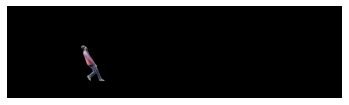

In [ ]:
img = cv2.cvtColor(panoramaForegrounds[4], cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')

In [ ]:
for p in tqdm(panoramaForegrounds):
    mask = p.copy()
    mask[(mask[:,:,0] != 0) & (mask[:,:,1] != 0) & (mask[:,:,2] != 0)] = [255, 255, 255]
    BaseImage = cv2.bitwise_or(p, cv2.bitwise_and(BaseImage, cv2.bitwise_not(mask)))

cv2.imwrite("/content/drive/MyDrive/csci576/test2/output1/Stitched_Panorama-" + source + "-" + str(f) + "-" + str(frameSkip) + ".png", BaseImage)

100%|██████████| 31/31 [00:01<00:00, 16.42it/s]


True

In [ ]:
from pathlib import Path
import os

def ReadImages(ImageFolderPath):
    Images = []									# Input Images will be stored in this list.

	# Checking if path is of folder.
    if os.path.isdir(ImageFolderPath):                              # If path is of a folder contaning images.
        ImageNames = os.listdir(ImageFolderPath)
        ImageNames_Split = []
        for i in range(0, len(ImageNames)):
          ImageName = ImageNames[i]
          if (Path(ImageFolderPath + ImageName).is_file()):
            ImageNames_Split.append([int(os.path.splitext(os.path.basename(ImageName))[0].replace("image", "")), ImageFolderPath + ImageName])

        ImageNames_Split = sorted(ImageNames_Split, key=lambda x:x[0])
        ImageNames_Sorted = [ImageNames_Split[i][1] for i in range(len(ImageNames_Split))]

        '''for i in range(len(ImageNames_Sorted)):                     # Getting all image's name present inside the folder.
            ImageName = ImageNames_Sorted[i]
            InputImage = cv2.imread(ImageFolderPath + "/" + ImageName)  # Reading images one by one.

            # Checking if image is read
            if InputImage is None:
                print("Not able to read image: {}".format(ImageName))
                exit(0)

            Images.append(InputImage)                               # Storing images.'''

    else:                                       # If it is not folder(Invalid Path).
        print("\nEnter valid Image Folder Path.\n")

    if len(Images) < 2:
        print("\nNot enough images found. Please provide 2 or more images.\n")
        exit(1)

    return ImageNames_Split

def ReadImagesPanoramaF(ImageFolderPath):
    Images = []									# Input Images will be stored in this list.

	# Checking if path is of folder.
    if os.path.isdir(ImageFolderPath):                              # If path is of a folder contaning images.
        ImageNames = os.listdir(ImageFolderPath)
        ImageNames_Split = []
        for i in range(0, len(ImageNames)):
          ImageName = ImageNames[i]
          if (Path(ImageFolderPath + ImageName).is_file()):
            InmageNameIdx = os.path.splitext(os.path.basename(ImageName))[0].replace("image", "").split("-")
            ImageNames_Split.append([(int(InmageNameIdx[0]), int(InmageNameIdx[1])), ImageFolderPath + ImageName])


        ImageNames_Split = sorted(ImageNames_Split, key=lambda x:(x[0], x[1]))
        ImageNames_Sorted = [ImageNames_Split[i][1] for i in range(len(ImageNames_Split))]

        '''for i in range(len(ImageNames_Sorted)):                     # Getting all image's name present inside the folder.
            ImageName = ImageNames_Sorted[i]
            InputImage = cv2.imread(ImageFolderPath + "/" + ImageName)  # Reading images one by one.


            # Checking if image is read
            if InputImage is None:
                print("Not able to read image: {}".format(ImageName))
                exit(0)

            Images.append(InputImage)                               # Storing images.'''

    else:                                       # If it is not folder(Invalid Path).
        print("\nEnter valid Image Folder Path.\n")

    if len(Images) < 2:
        print("\nNot enough images found. Please provide 2 or more images.\n")
        exit(1)

    return ImageNames_Split

def ReadImage(filePath):
    image = cv2.imread(filePath)
    return image


forgroundImageNames_read = ReadImagesPanoramaF("/content/drive/MyDrive/csci576/test2/output1_panoramaF/")
BaseImageNames_read = ReadImages("/content/drive/MyDrive/csci576/test2/output1_baseImage/")
print(forgroundImageNames_read)
print(BaseImageNames_read)


Not enough images found. Please provide 2 or more images.


Not enough images found. Please provide 2 or more images.

[[(1, 0), '/content/drive/MyDrive/csci576/test2/output1_panoramaF/image001-000.jpg'], [(2, 0), '/content/drive/MyDrive/csci576/test2/output1_panoramaF/image002-000.jpg'], [(2, 1), '/content/drive/MyDrive/csci576/test2/output1_panoramaF/image002-001.jpg'], [(3, 0), '/content/drive/MyDrive/csci576/test2/output1_panoramaF/image003-000.jpg'], [(3, 1), '/content/drive/MyDrive/csci576/test2/output1_panoramaF/image003-001.jpg'], [(3, 2), '/content/drive/MyDrive/csci576/test2/output1_panoramaF/image003-002.jpg'], [(4, 0), '/content/drive/MyDrive/csci576/test2/output1_panoramaF/image004-000.jpg'], [(4, 1), '/content/drive/MyDrive/csci576/test2/output1_panoramaF/image004-001.jpg'], [(4, 2), '/content/drive/MyDrive/csci576/test2/output1_panoramaF/image004-002.jpg'], [(4, 3), '/content/drive/MyDrive/csci576/test2/output1_panoramaF/image004-003.jpg'], [(5, 0), '/content/drive/MyDr

In [ ]:
imagesPlay = []
for i in range(len(BaseImageNames_read)-5, len(BaseImageNames_read)-2):
  for j in range(0, len(forgroundImageNames_read)):
    if (forgroundImageNames_read[j][0][0] == BaseImageNames_read[i][0]):
      imagesPlay.append((BaseImageNames_read[i][1], forgroundImageNames_read[j][1]))

imagesPlay = sorted(imagesPlay, key=lambda x:int(x[1].split(".")[0].split("-")[1]))
print(imagesPlay)

[('/content/drive/MyDrive/csci576/test2/output1_baseImage/image040.jpg', '/content/drive/MyDrive/csci576/test2/output1_panoramaF/image040-000.jpg'), ('/content/drive/MyDrive/csci576/test2/output1_baseImage/image041.jpg', '/content/drive/MyDrive/csci576/test2/output1_panoramaF/image041-000.jpg'), ('/content/drive/MyDrive/csci576/test2/output1_baseImage/image042.jpg', '/content/drive/MyDrive/csci576/test2/output1_panoramaF/image042-000.jpg'), ('/content/drive/MyDrive/csci576/test2/output1_baseImage/image040.jpg', '/content/drive/MyDrive/csci576/test2/output1_panoramaF/image040-001.jpg'), ('/content/drive/MyDrive/csci576/test2/output1_baseImage/image041.jpg', '/content/drive/MyDrive/csci576/test2/output1_panoramaF/image041-001.jpg'), ('/content/drive/MyDrive/csci576/test2/output1_baseImage/image042.jpg', '/content/drive/MyDrive/csci576/test2/output1_panoramaF/image042-001.jpg'), ('/content/drive/MyDrive/csci576/test2/output1_baseImage/image040.jpg', '/content/drive/MyDrive/csci576/test2/o

In [ ]:
count = 0
for frames in tqdm(imagesPlay):
  foreground = ReadImage(frames[1])
  background = ReadImage(frames[0])

  mask = foreground.copy()
  mask[(mask[:,:,0] != 0) & (mask[:,:,1] != 0) & (mask[:,:,2] != 0)] = [255, 255, 255]

  img = cv2.bitwise_or(foreground, cv2.bitwise_and(background, cv2.bitwise_not(mask)))

  cv2.imwrite("/content/drive/MyDrive/csci576/test2/output2/image" + f'{count:03}' + ".jpg", img)
  count += 1

100%|██████████| 123/123 [00:54<00:00,  2.27it/s]


# https://github.com/srihari-humbarwadi/person_segmentation_tf2.0

In [ ]:
import sys
sys.path.append("/content/drive/MyDrive/csci576/person_segmentation_tf2.0/")

In [ ]:
import tensorflow as tf
import numpy as np
import cv2
from glob import glob
from deeplab_test import DeepLabV3Plus
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import h5py

print('TensorFlow', tf.__version__)

TensorFlow 2.9.2


In [ ]:
H, W = 1280, 1280

train_images = sorted(glob('resized_images/*'))
train_masks = sorted(glob('resized_masks/*'))

val_images = sorted(glob('validation_data/images/*'))
val_masks = sorted(glob('validation_data/masks/*'))

print(f'Found {len(train_images)} training images')
print(f'Found {len(train_masks)} training masks')

print(f'Found {len(val_images)} validation images')
print(f'Found {len(val_masks)} validation masks')

for i in range(len(train_masks)):
    assert train_images[i].split('/')[-1].split('.')[0] == train_masks[i].split('/')[-1].split('.')[0]

for i in range(len(val_masks)):
    assert val_images[i].split('/')[-1].split('.')[0] == val_masks[i].split('/')[-1].split('.')[0]

Found 0 training images
Found 0 training masks
Found 0 validation images
Found 0 validation masks


In [ ]:
def print_attrs(name, obj):
    shift = name.count('/') * '    '
    print(shift + name)
    for key, val in obj.attrs.items():
        print(shift + '    ' + f"{key}: {val}")

with h5py.File('/content/drive/MyDrive/csci576/person_segmentation_tf2.0/top_weights.h5', mode='r') as hdfid:
     hdfid.visititems(print_attrs)

ASPP_concat
    weight_names: []
ASPP_conv2d_d1
    weight_names: [b'ASPP_conv2d_d1/kernel:0']
    ASPP_conv2d_d1/ASPP_conv2d_d1
        ASPP_conv2d_d1/ASPP_conv2d_d1/kernel:0
ASPP_conv2d_d12
    weight_names: [b'ASPP_conv2d_d12/kernel:0']
    ASPP_conv2d_d12/ASPP_conv2d_d12
        ASPP_conv2d_d12/ASPP_conv2d_d12/kernel:0
ASPP_conv2d_d18
    weight_names: [b'ASPP_conv2d_d18/kernel:0']
    ASPP_conv2d_d18/ASPP_conv2d_d18
        ASPP_conv2d_d18/ASPP_conv2d_d18/kernel:0
ASPP_conv2d_d6
    weight_names: [b'ASPP_conv2d_d6/kernel:0']
    ASPP_conv2d_d6/ASPP_conv2d_d6
        ASPP_conv2d_d6/ASPP_conv2d_d6/kernel:0
ASPP_conv2d_final
    weight_names: [b'ASPP_conv2d_final/kernel:0']
    ASPP_conv2d_final/ASPP_conv2d_final
        ASPP_conv2d_final/ASPP_conv2d_final/kernel:0
activation
    weight_names: []
activation_1
    weight_names: []
activation_10
    weight_names: []
activation_11
    weight_names: []
activation_12
    weight_names: []
activation_13
    weight_names: []
activation_14
  

In [ ]:
!nano /content/drive/MyDrive/csci576/person_segmentation_tf2.0/deeplab_test.py

/bin/bash: nano: command not found


In [ ]:
model = DeepLabV3Plus(H, W)
model.load_weights('/content/drive/MyDrive/csci576/person_segmentation_tf2.0/top_weights.h5')

*** Building DeepLabv3Plus Network ***


/content/drive/MyDrive/csci576/person_segmentation_tf2.0/resnet/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


ValueError: ignored

In [ ]:
def pad_inputs(image, crop_height=H, crop_width=H, pad_value=0):
    dims = tf.cast(tf.shape(image), dtype=tf.float32)
    h_pad = tf.maximum(crop_height - dims[0], 0)
    w_pad = tf.maximum(crop_width - dims[1], 0)
    padded_image = tf.pad(image, paddings=[[0, h_pad], [0, w_pad], [0, 0]], constant_values=pad_value)
    return padded_image, h_pad, w_pad

def resize_preserve_aspect_ratio(image_tensor, max_side_dim):
    img_h, img_w = image_tensor.shape.as_list()[:2]
    min_dim = tf.maximum(img_h, img_w)
    resize_ratio = max_side_dim / min_dim
    new_h, new_w = resize_ratio * img_h, resize_ratio * img_w
    resized_image_tensor = tf.image.resize(image_tensor, size=[new_h, new_w], method='bilinear')
    return resized_image_tensor

def prepare_inputs(image_path, H=H, W=W, maintain_resolution=False):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_image(image, channels=3)
    image.set_shape([None, None, 3])
    shape = image.shape.as_list()[:2]
    if maintain_resolution:
        disp_image = image.numpy().copy()
    image = tf.cast(image, dtype=tf.float32)
    resized = False
    if tf.maximum(shape[0], shape[1]) > H:
        resized = True
        image = resize_preserve_aspect_ratio(image, max_side_dim=H)
    image, h_pad, w_pad = pad_inputs(image)
    if not maintain_resolution:
        disp_image = image.numpy().copy()
    image = image[:, :, ::-1] - tf.constant([103.939, 116.779, 123.68])
    return disp_image, tf.cast(image, dtype=tf.float32), np.int32(h_pad.numpy()), np.int32(w_pad.numpy()), resized

def resize_mask(mask, size):
    mask = tf.image.resize(mask[..., None], size, method='nearest')
    return mask[..., 0]

def pipeline(image_path, alpha=0.7, maintain_resolution=False):
    disp_image, image, h_pad, w_pad, resized = prepare_inputs(image_path, maintain_resolution=maintain_resolution)
    mask = model(image[None, ...])[0, ..., 0] > 0.5
    mask = tf.cast(mask, dtype=tf.uint8)
    b_h, b_w = (image.shape[:2] - tf.constant([h_pad, w_pad])).numpy()
    disp_mask = mask[:b_h, :b_w].numpy()
    if resized and maintain_resolution:
        disp_mask = resize_mask(disp_mask, disp_image.shape[:2]).numpy()
    else:
        disp_image = disp_image[:b_h, :b_w]
    overlay = disp_image.copy()
    overlay[disp_mask == 0] = [255, 0, 0]
    overlay[disp_mask == 1] = [0, 0, 255]
    cv2.addWeighted(disp_image, alpha, overlay, 1-alpha, 0, overlay)
    extracted_pixels = disp_image.copy()
    extracted_pixels[disp_mask == 0] = [207, 207, 207]
    return np.uint8(disp_image), np.uint8(np.concatenate([disp_mask[..., None]]*3, axis=-1)*255), np.uint8(overlay), np.uint8(extracted_pixels)

# https://medium.com/@navekshasood/image-stitching-to-create-a-panorama-5e030ecc8f7

In [ ]:
img_1 = cv2.imread('/content/drive/MyDrive/csci576/test1/image001.jpg')
img1 = cv2.cvtColor(img_1,cv2.COLOR_BGR2GRAY)
img_2 = cv2.imread('/content/drive/MyDrive/csci576/test1/image020.jpg')
img2 = cv2.cvtColor(img_2,cv2.COLOR_BGR2GRAY)

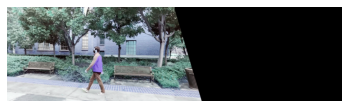

In [ ]:
sift = cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)
good = []
for m in matches:
  if (m[0].distance < 0.5*m[1].distance):
    good.append(m)
matches = np.asarray(good)

if (len(matches[:,0]) >= 4):
    src = np.float32([ kp1[m.queryIdx].pt for m in matches[:,0] ]).reshape(-1,1,2)
    dst = np.float32([ kp2[m.trainIdx].pt for m in matches[:,0] ]).reshape(-1,1,2)
    H, masked = cv2.findHomography(src, dst, cv2.RANSAC, 5.0)
else:
    raise AssertionError('Can’t find enough keypoints.')

dst = cv2.warpPerspective(img_1,H,((img_1.shape[1] + img_2.shape[1]), img_2.shape[0])) #wraped image
dst[0:img_2.shape[0], 0:img_2.shape[1]] = img_2 #stitched image
cv2.imwrite('output.jpg',dst)
plt.imshow(dst)
plt.axis('off')
plt.show()